In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

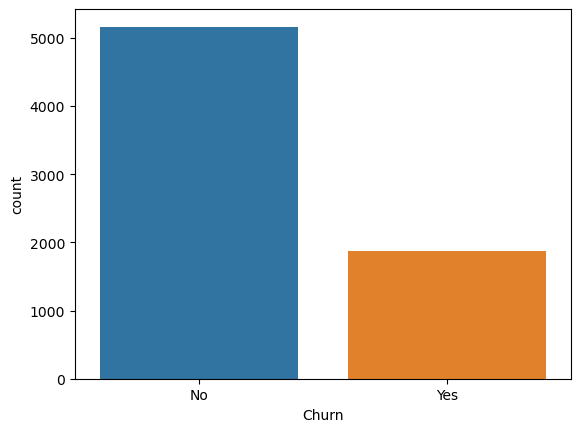

In [6]:
# display the balance of class labels churns with count plot
sns.countplot(data=df,x='Churn')

In [7]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

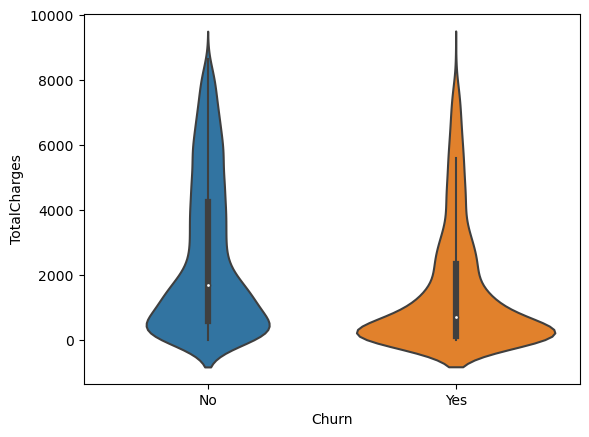

In [9]:
# distribution of total charges between churn categories with box plot
sns.violinplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

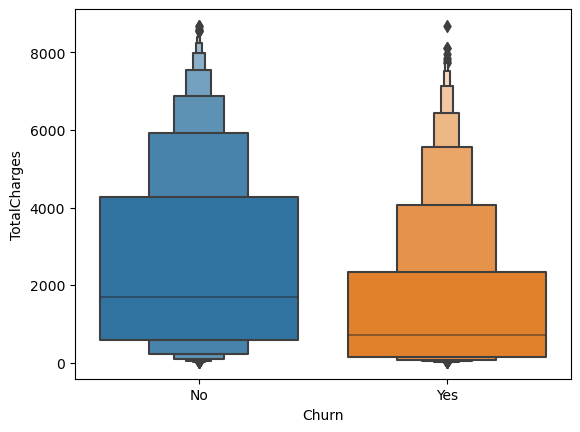

In [10]:
sns.boxenplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

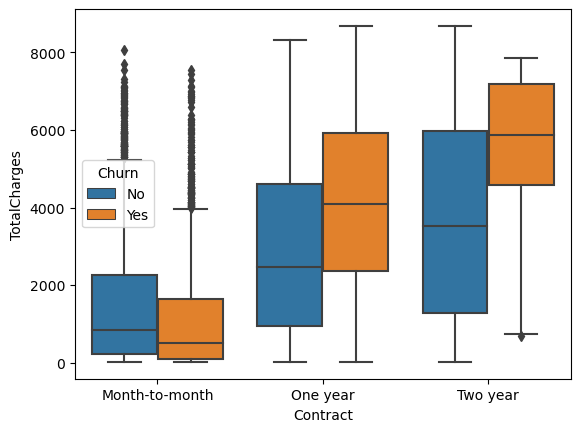

In [11]:
# box plot showing distribution of total charges per contract type, hue based on churn class
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')

In [16]:
# correlation between features
# convert categorical columns to dummy variables
df_dummies = pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines'
                               ,'OnlineSecurity','DeviceProtection','TechSupport','InternetService','StreamingTV',
                               'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']])
corr_df = df_dummies.corr()

In [22]:
corr_yes = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

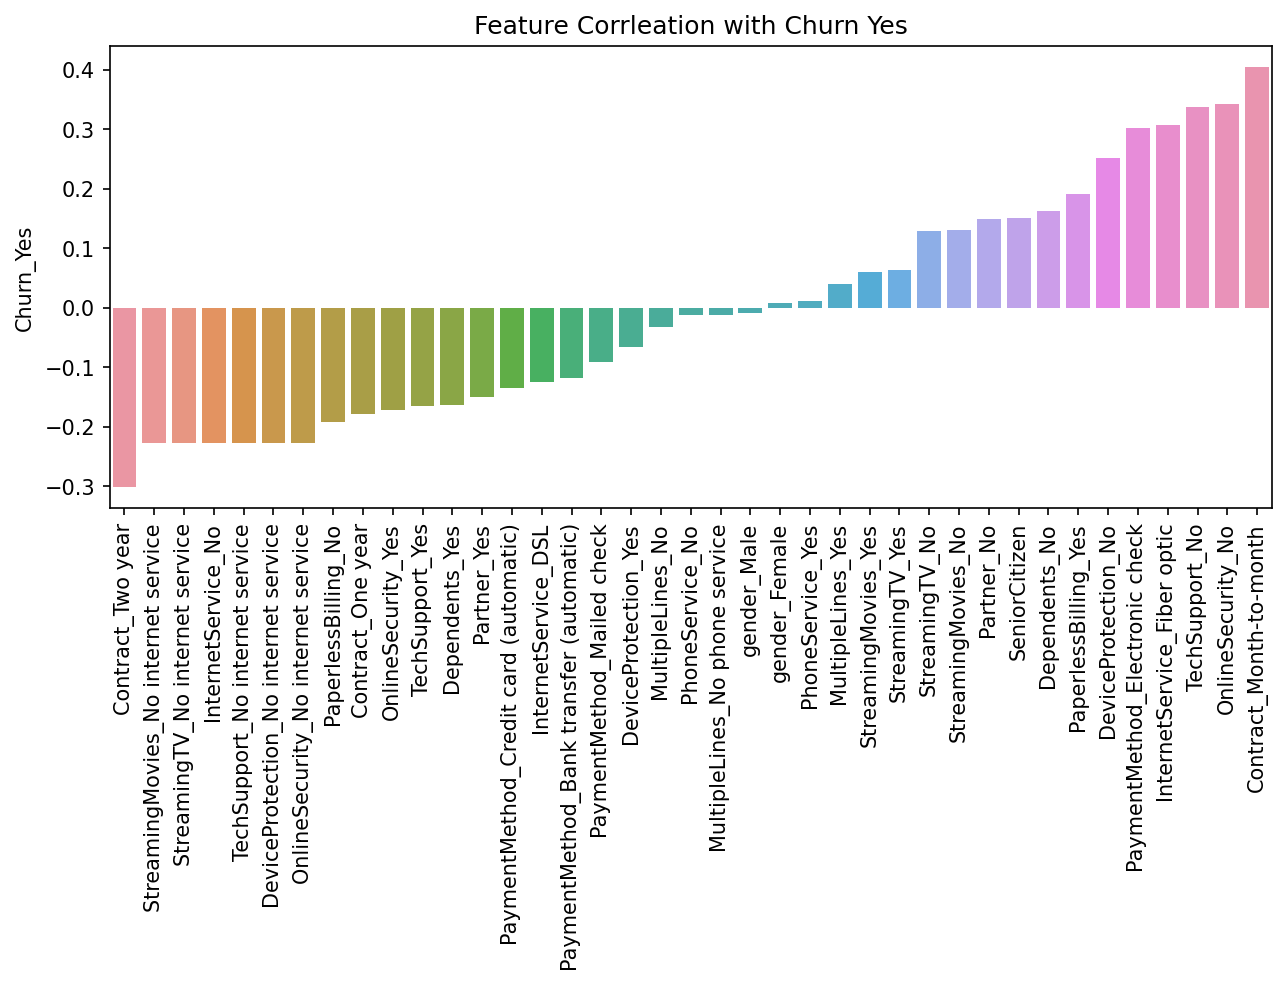

In [27]:
plt.figure(figsize=(10,4),dpi=150)
plt.title('Feature Corrleation with Churn Yes')
sns.barplot(x=corr_yes.index,y=corr_yes)
plt.xticks(rotation=90);

In [28]:
# cohorts & churn analysis

In [29]:
# what are the 3 contract types available
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [30]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

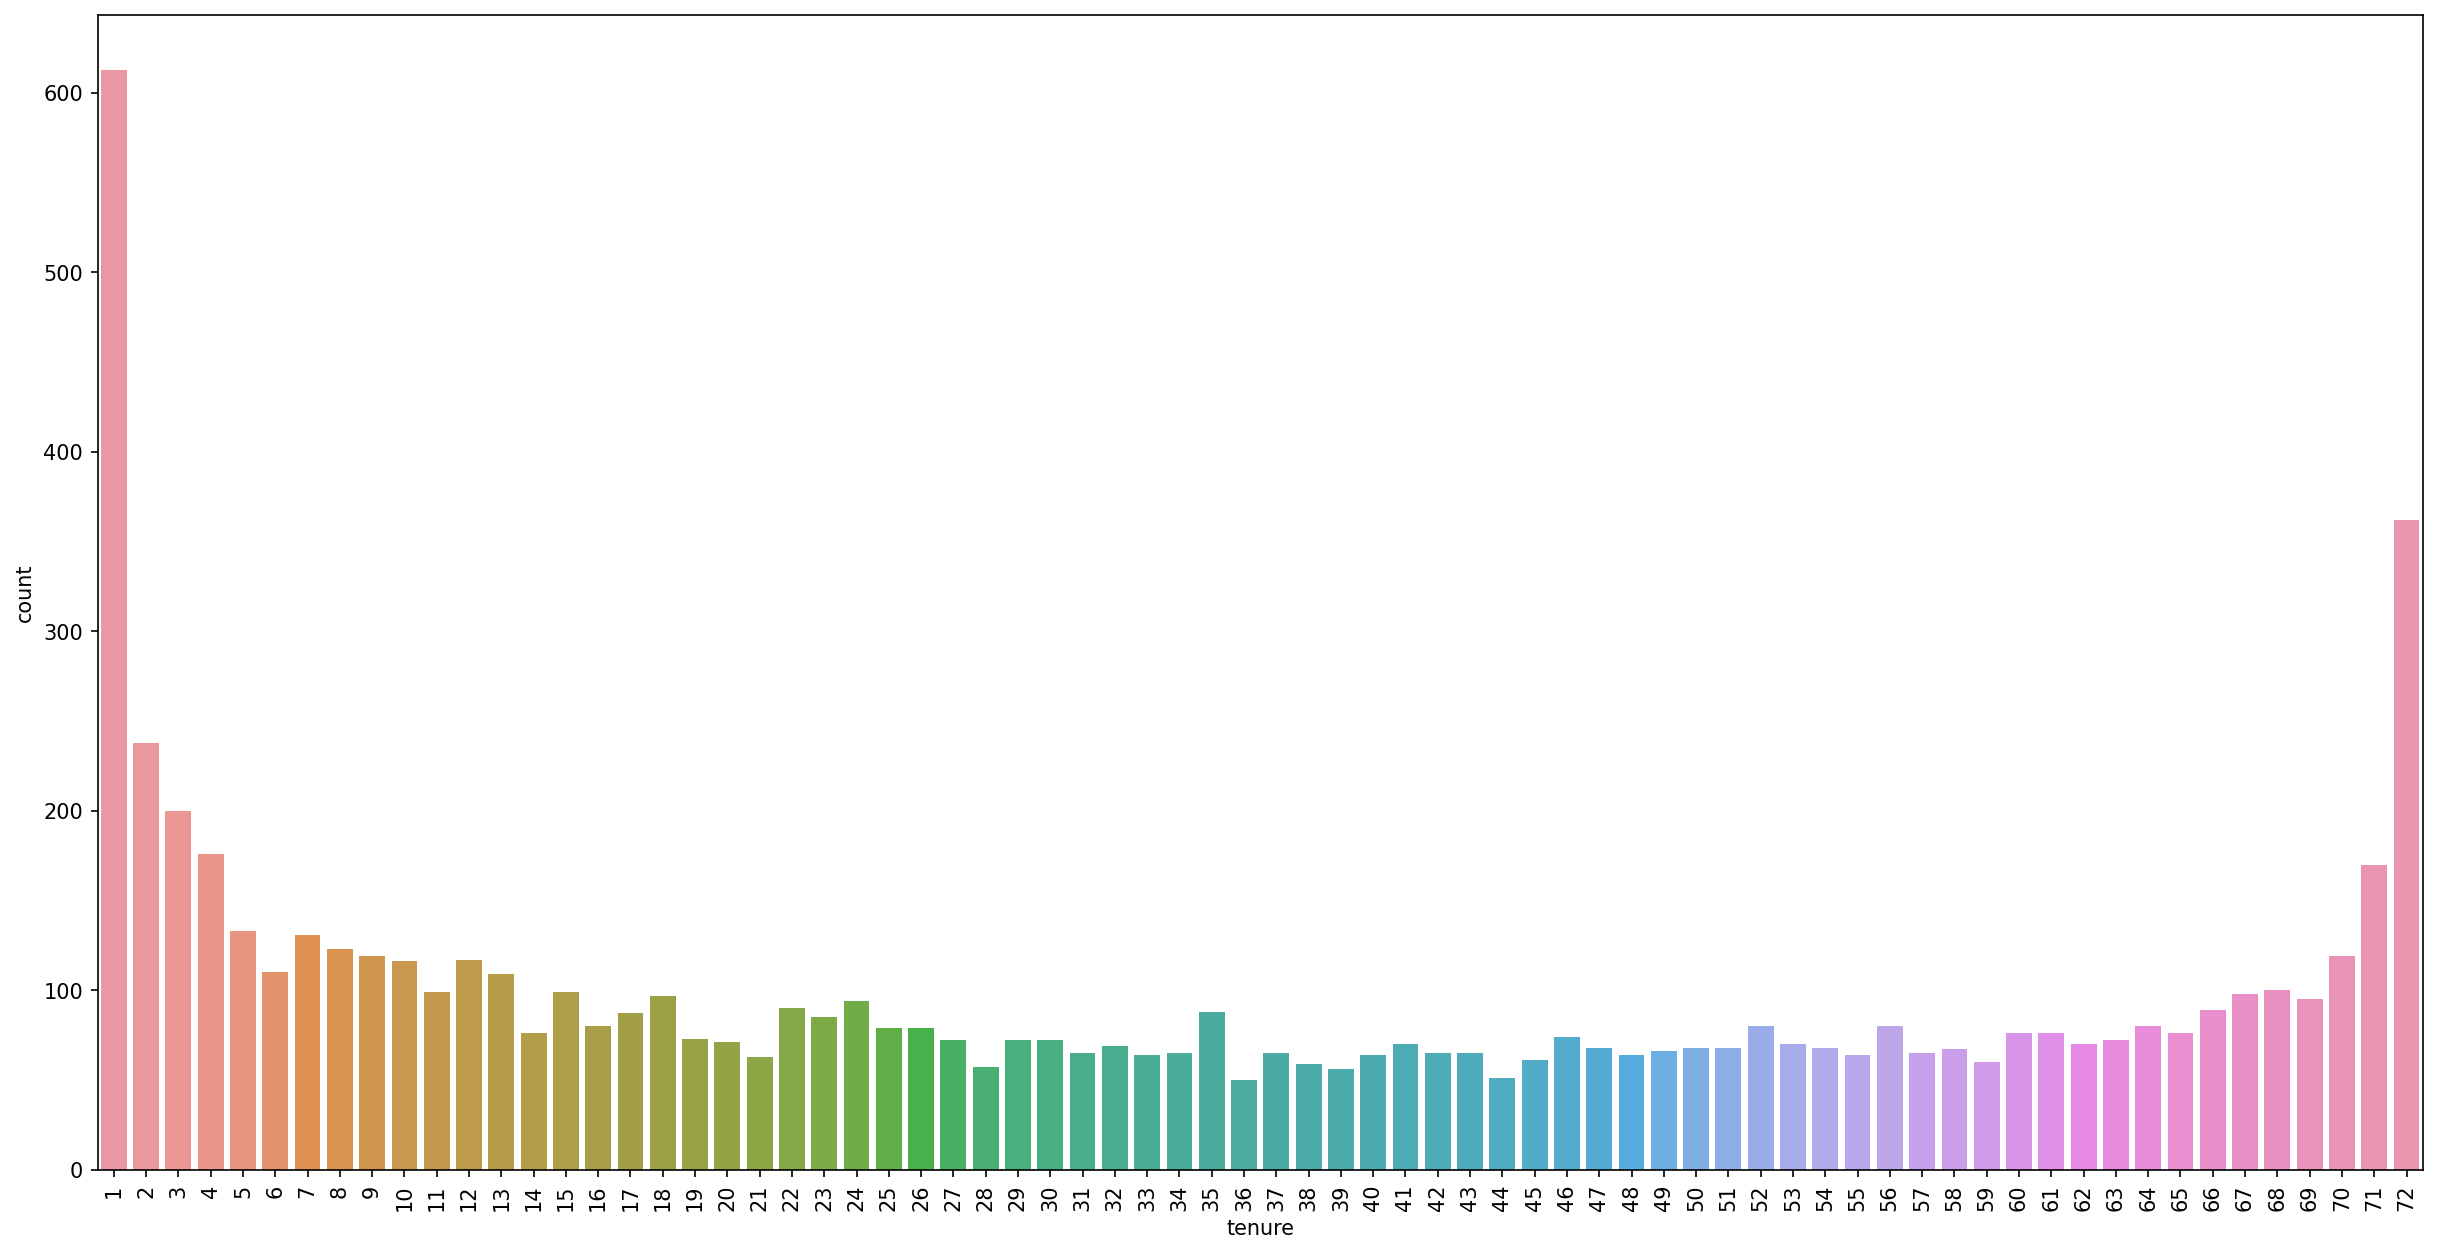

In [34]:
# histogram displaying the distribution of tenure column
plt.figure(figsize=(20,10),dpi=150)
sns.countplot(data=df,x='tenure')
plt.xticks(rotation=90);

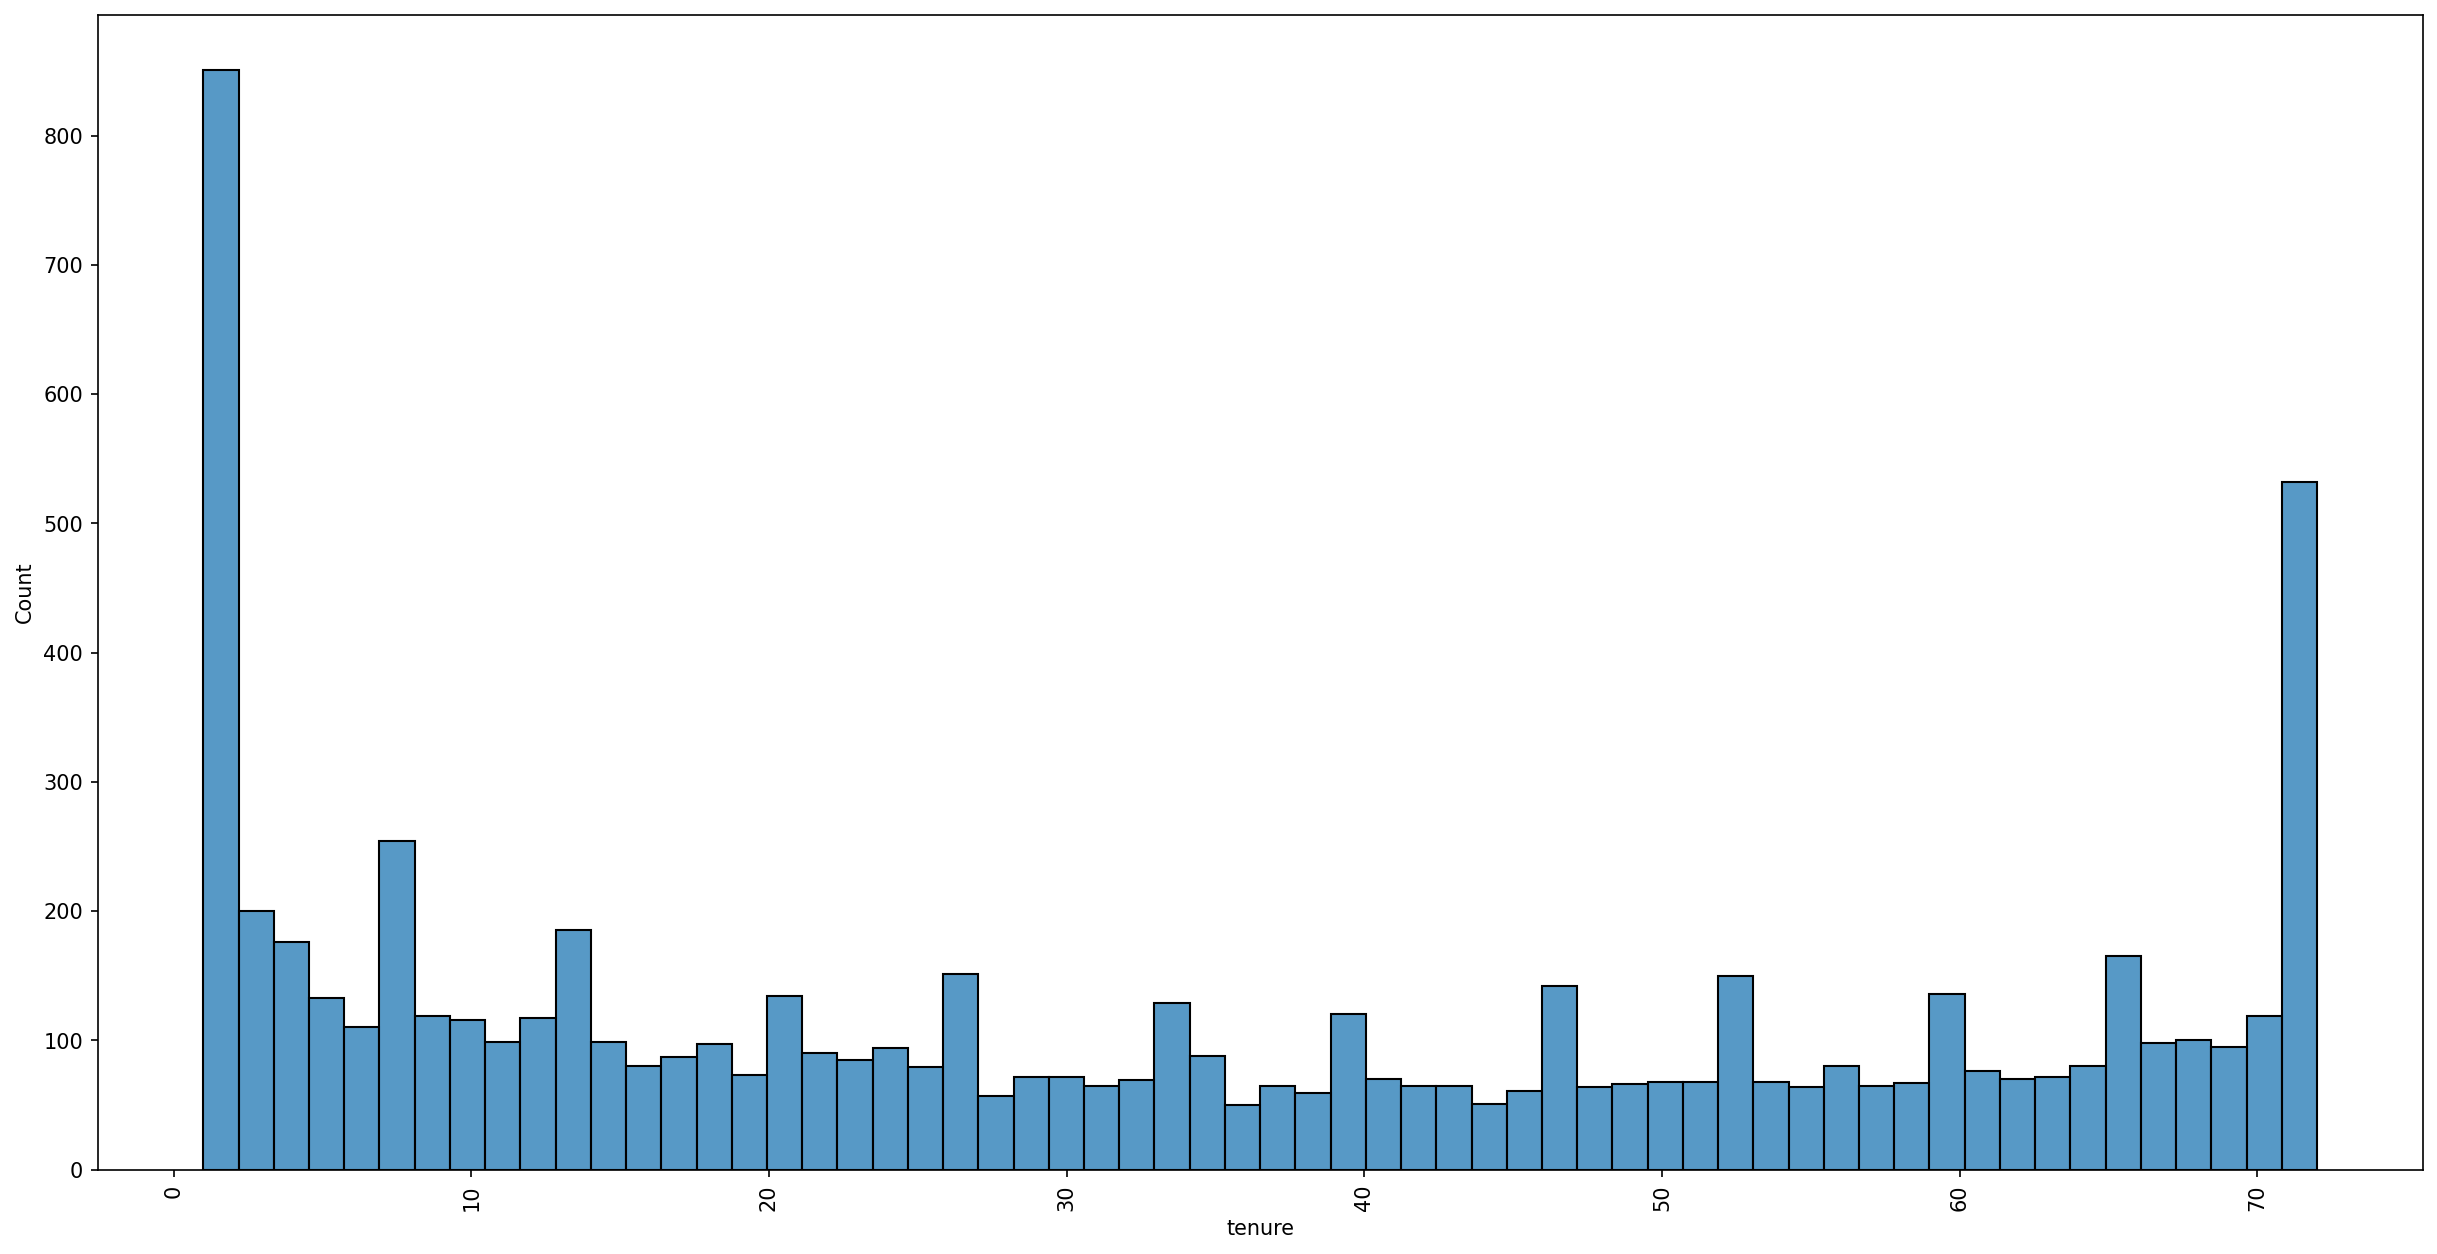

In [36]:
plt.figure(figsize=(20,10),dpi=150)
sns.histplot(data=df,x='tenure',bins=60)
plt.xticks(rotation=90);

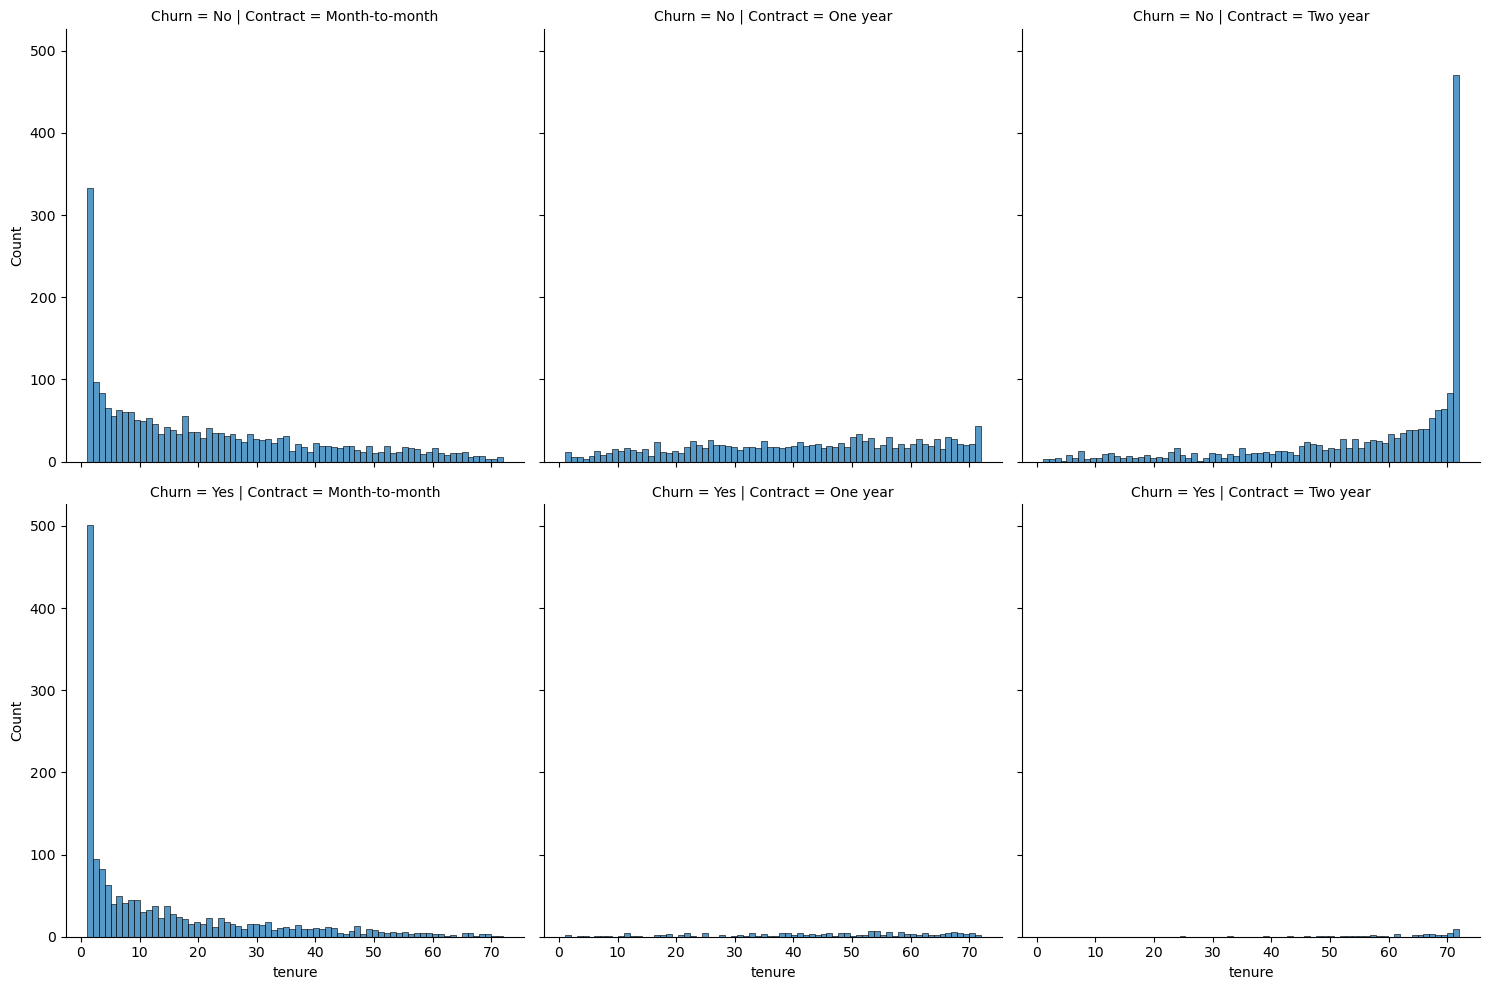

In [38]:
# create a histogram separated by 2 additional features churn and contract
sns.displot(data=df, x='tenure',bins=70,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

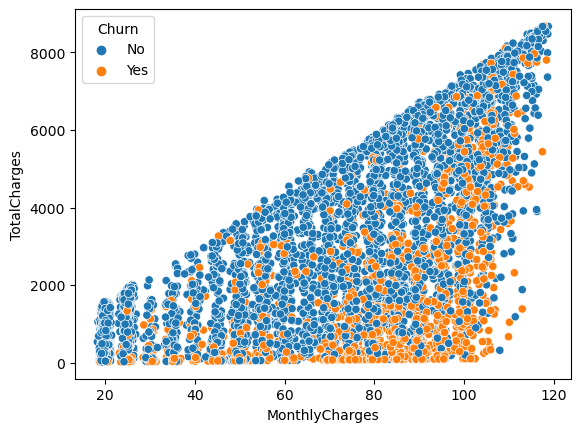

In [42]:
# display a scatter plot of total charges versus monthly charges and color hue by churn
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn')

In [47]:
# cohorts based on tenure
churns = df.groupby(['Churn','tenure']).count()
yes_churn = churns.transpose()['Yes']
no_churn = churns.transpose()['No']

In [58]:
churn_rate = 100 * yes_churn/(yes_churn + no_churn)
churn_rate = churn_rate.transpose()['customerID']

<AxesSubplot:xlabel='tenure'>

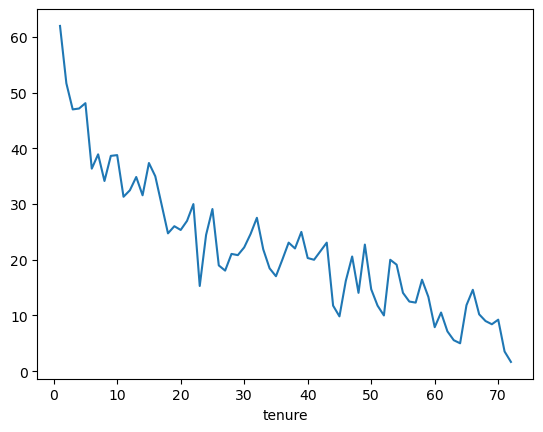

In [59]:
churn_rate.plot()

In [60]:
# boarder cohort groups

In [63]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [65]:
df['tenure_cohort'] = df['tenure'].apply(cohort)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

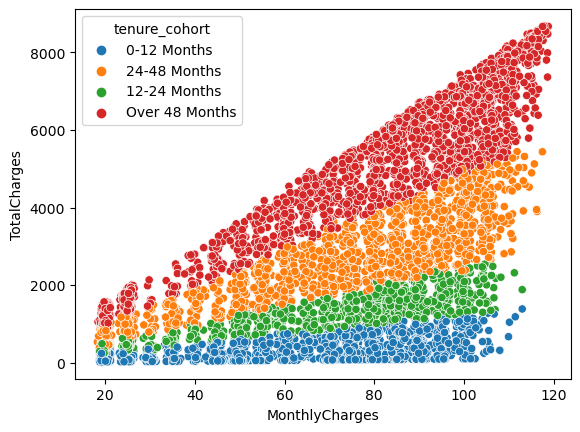

In [66]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='tenure_cohort')

<AxesSubplot:xlabel='tenure_cohort', ylabel='count'>

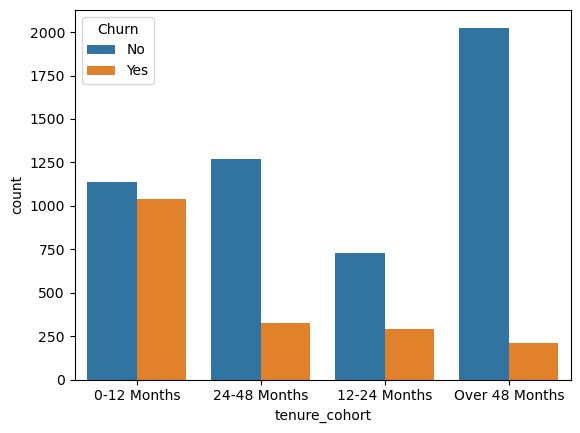

In [67]:
# create a count plot showing the churn count per cohort
sns.countplot(data=df,x='tenure_cohort',hue='Churn')

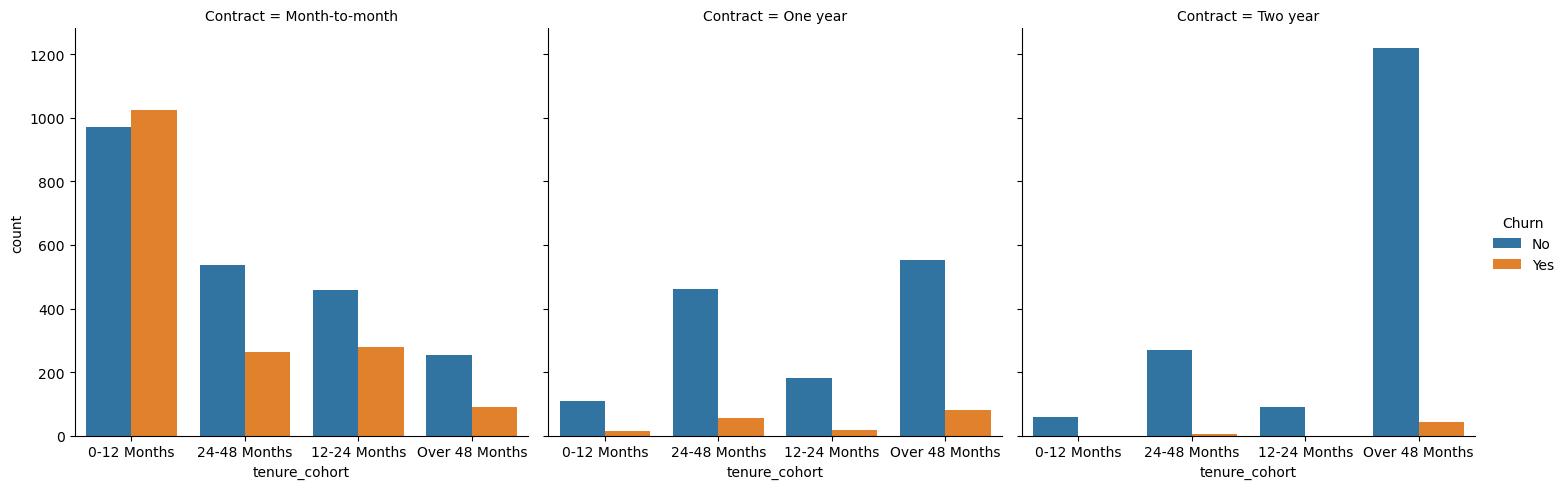

In [69]:
# count plot counts per tenure cohort , separated by contract type
sns.catplot(data=df,x='tenure_cohort',hue='Churn',kind='count',col='Contract')

In [70]:
#predictive modeling

In [71]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


In [75]:
X = df.drop(['customerID','Churn'],axis=1)

In [76]:
X = pd.get_dummies(X,drop_first=True)

In [78]:
y = df['Churn']

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier(max_depth=6)

In [84]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [85]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [86]:
pred = dt.predict(X_test)

In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


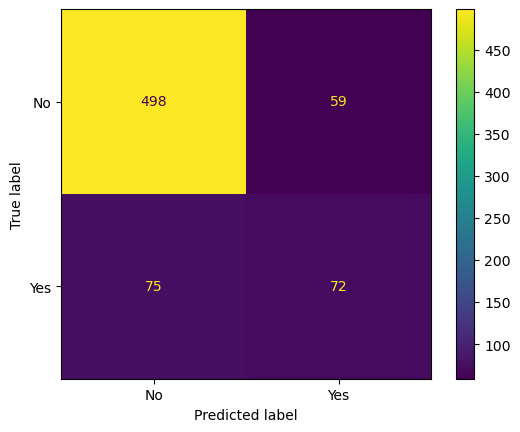

In [88]:
plot_confusion_matrix(dt,X_test,y_test)

In [91]:
imp_f = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feat Imp'])

In [101]:
imp_f.sort_values('Feat Imp')
imp_f = imp_f[imp_f['Feat Imp'] > 0]
imp_f =imp_f.sort_values('Feat Imp')

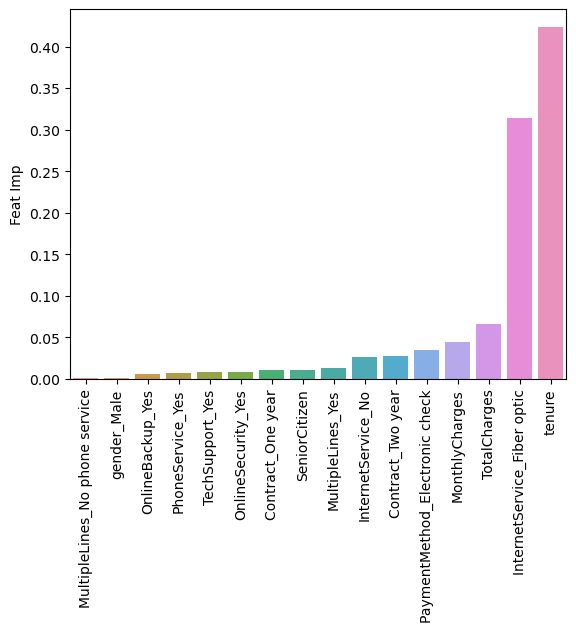

In [102]:
sns.barplot(data=imp_f,x=imp_f.index,y='Feat Imp')
plt.xticks(rotation=90);

In [103]:
from sklearn.tree import plot_tree

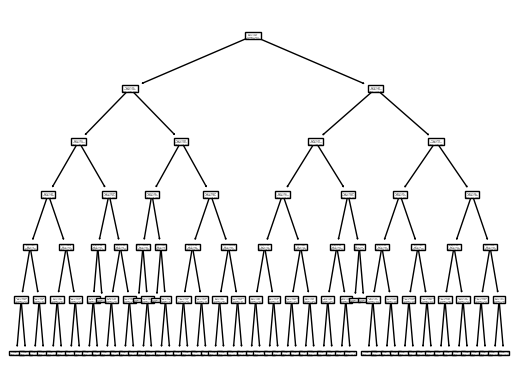

In [105]:
plot_tree(dt);

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = RandomForestClassifier(max_depth=6)

In [113]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [114]:
p = rfc.predict(X_test)

In [115]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.62      0.44      0.51       147

    accuracy                           0.83       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.83      0.81       704



C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


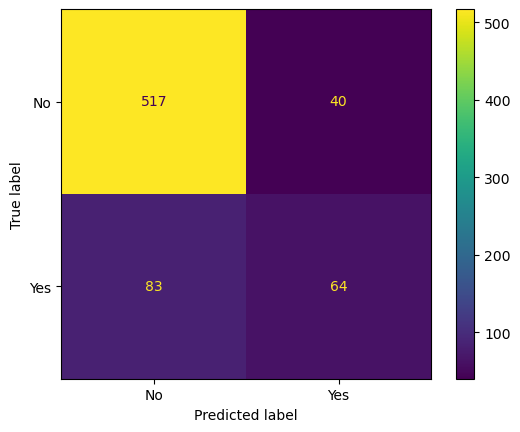

In [116]:
plot_confusion_matrix(rfc,X_test,y_test)

In [117]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [128]:
ada = AdaBoostClassifier(n_estimators=100)
gb = GradientBoostingClassifier()

In [129]:
ada.fit(X_train,y_train)
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [130]:
p_a = ada.predict(X_test)
p_g = gb.predict(X_test)

In [131]:
print(classification_report(y_test,p_a))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [132]:
print(classification_report(y_test,p_g))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


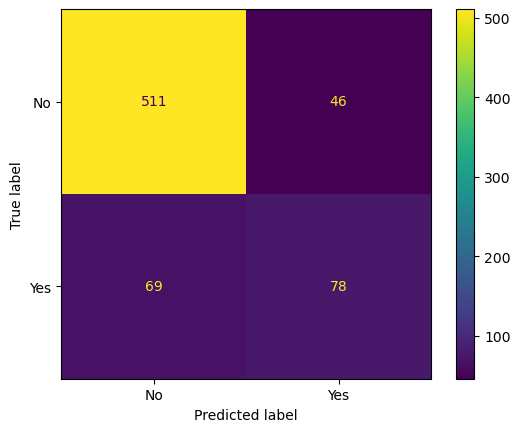

In [134]:
plot_confusion_matrix(ada,X_test,y_test)

C:\sofware\anaconda3\envs\udemy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


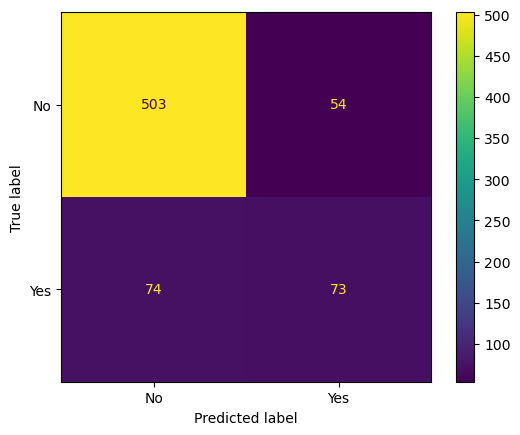

In [127]:
plot_confusion_matrix(gb,X_test,y_test)